# 데이터시각화 특강 (7주차) 10월25일 _1
> Partial correlation

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Partial correlation]

## Partial Correlation 

### 아이스크림을 많이 먹으면 걸리는 병 

`-` ref- 데이터 과학자의 사고법: 더 나은 선택을 위한 통계학적 통찰의 힘 

https://books.google.co.kr/books?id=qy4iEAAAQBAJ&pg=PT87&lpg=PT87&dq=%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC%EC%9D%84+%EB%A7%8E%EC%9D%B4+%EB%A8%B9%EC%9C%BC%EB%A9%B4+%EA%B1%B8%EB%A6%AC%EB%8A%94+%EB%B3%91+%EC%86%8C%EC%95%84%EB%A7%88%EB%B9%84&source=bl&ots=V9B7ZG6oR-&sig=ACfU3U0UMd4ehuRXYxI69TT6lIlU-r91bA&hl=en&sa=X&ved=2ahUKEwj13JSV19LzAhVEGaYKHdgfDgcQ6AF6BAgCEAM#v=onepage&q=%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC%EC%9D%84%20%EB%A7%8E%EC%9D%B4%20%EB%A8%B9%EC%9C%BC%EB%A9%B4%20%EA%B1%B8%EB%A6%AC%EB%8A%94%20%EB%B3%91%20%EC%86%8C%EC%95%84%EB%A7%88%EB%B9%84&f=false

`-` 내용요약 

- 여름 $\to$ 수영장 $\to$ 소아마비
- 여름 $\to$ 아이스크림 
- 아이스크림과 소아마비는 상관관계가 높다: 아이스크림 성분중에서 소아마비를 유발하는 유해물질이 있을 것이다 (?) 

`-` 아래와 같이 모형을 간단하게 하자. 

- 온도 $\to$ 소아마비 
- 온도 $\to$ 아이스크림 

### Toy exam 

In [54]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

`-` 교재의 예제상황은 예를들면 아래와 같다. 

`-` 아이스크림 판매량 = 20 + 온도 $\times$ 2 + $\epsilon$

In [2]:
np.random.seed(1) 
temp= np.array([-10.2, -5.2, 0.1, 10.1, 12.2, 14.7, 
                25.4, 26.8, 28.9, 35.1, 32.2, 34.6])
ϵ1= np.random.normal(size=12,scale=5)
icecream= 20 + temp * 2 + ϵ1 

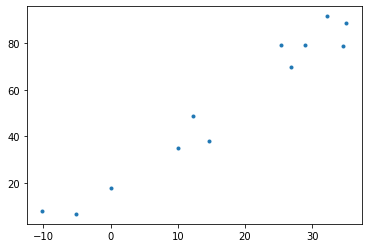

In [3]:
plt.plot(temp,icecream,'.')

- 온도와 아이스크림 판매량의 산점도 

`-` 소아마비 = 30 + 온도 $\times$ 0.5 + $\epsilon^*$

In [4]:
np.random.seed(2) 
ϵ2= np.random.normal(size=12,scale=5) 
disease = 30+ temp* 0.5 + ϵ2

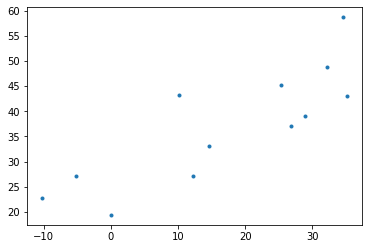

In [5]:
plt.plot(temp,disease,'.')

- 온도와 소아마비의 산점도 

`-` 아이스크림과 질병의 산점도를 그려보자. 

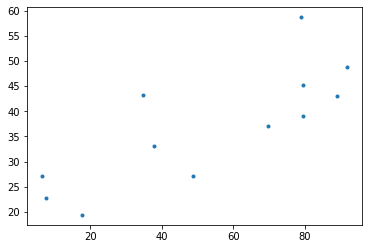

In [6]:
plt.plot(icecream,disease,'.')

- 양의 상관관계에 있다. 

`-` 아이스크림 중 어떠한 물질이 소아마비를 일으키는것이 분명하므로 (인과성이 분명해보이니까) 아래와 같은 모형을 세우자. <-- 여기서부터 틀렸음 

$${\tt disease}_i =\beta_0 +\beta_1 {\tt icecream}_i +\epsilon_i,\quad \textbf{for} ~~ i=1,2,\dots, 12$$

`-` 적절한 $\beta_0$와 $\beta_1$을 추정하면 우리는 아이스크림과 소아마비의 관계를 알 수 있다. <-- 틀린주장 
- 틀린 모형 
- 도대체 우리가 뭘 잘못했는가? 

`-` 두 변수 사이에 상관관계가 있어도 실제 원인은 다른 변수에 숨겨져 있는 경우가 많다. 

- 예제의상황: 아이스크림과 익사자도 양의 상관관계에 있을것이다. 
- 아이스크림을 먹이면 물에 빠져 죽는다 $\to$ 틀린주장 
- 사실 기온이 숨겨진 원인이다. 기온이 증가하면 아이스크림 판매량도 증가하고 폭염때문에 익사사고율도 높아지는 구조이다. 

`-` 아래와 같은 예제를 생각하자. 

- 인구수 $\to$ 교회 
- 인구수 $\to$ 범죄건수 
- 지역별 교회와 범죄건수를 살펴보면 상관관계가 높게 나올것임 


`-` 교회를 많이 지으면 범죄건수도 증가한다? 
- 사실 그렇지 않다. 
- 인구수가 비슷한 도시끼리 묶어서 비교해보면 교회와 범죄건수는 양의 상관관계에 있지 않을것임 

`-` 올바른 분석: 온도가 비슷한 그룹끼리 묶어서 그려보자. $\to$ 상관계수가 줄어들 것이다. 

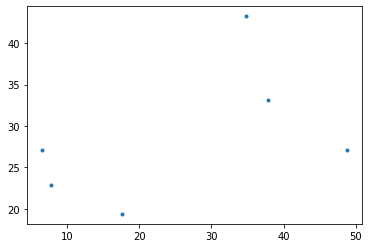

In [7]:
plt.plot(icecream[:6],disease[:6],'.')

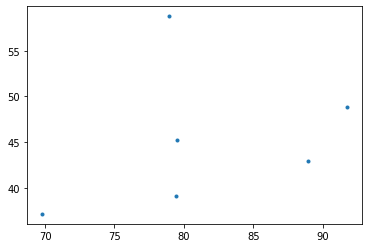

In [8]:
plt.plot(icecream[6:],disease[6:],'.')

`-` 진짜로 선형관계가 약해졌다.. 

### 좀 더 그럴듯한 자료 

`-` 위의 toy example은 데이터가 너무 작아서 억지스러움 

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/extremum.csv')

In [10]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,146,전주,2020-01-01,-0.5,4.3,15:09,-6.4,1:42,10.7
1,146,전주,2020-01-02,1.4,6.5,14:12,-3.0,7:55,9.5
2,146,전주,2020-01-03,2.6,7.6,13:32,-0.5,23:53,8.1
3,146,전주,2020-01-04,2.0,7.7,13:51,-2.6,5:30,10.3
4,146,전주,2020-01-05,2.5,8.6,14:05,-3.2,7:36,11.8
...,...,...,...,...,...,...,...,...,...
651,146,전주,2021-10-13,19.9,25.5,14:29,15.6,3:49,9.9
652,146,전주,2021-10-14,20.4,25.5,13:36,17.0,6:15,8.5
653,146,전주,2021-10-15,18.3,22.0,13:47,15.7,4:48,6.3
654,146,전주,2021-10-16,12.8,17.4,0:01,6.5,23:31,10.9


`-` 평균기온만 선택하여 뽑자. 

In [11]:
pd.Series(df.columns)

0          지점번호
1           지점명
2            일시
3       평균기온(℃)
4       최고기온(℃)
5        최고기온시각
6       최저기온(℃)
7     최저기온시각일교차
8    Unnamed: 8
dtype: object

In [12]:
temp=np.array(df.iloc[:,3])

In [13]:
len(temp)

656

`-` 아이스크림 판매량 

In [14]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

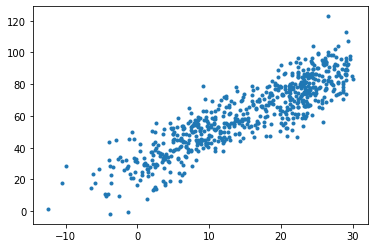

In [15]:
plt.plot(temp,icecream,'.')

`-` 소아마비

In [16]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease=temp*0.5 + 40 +ϵ2

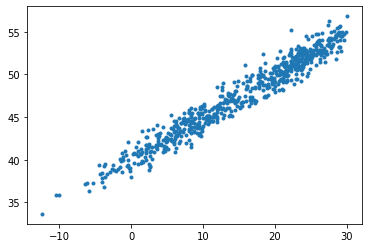

In [17]:
plt.plot(temp,disease,'.')

`-` 아이스크림과 소아마비

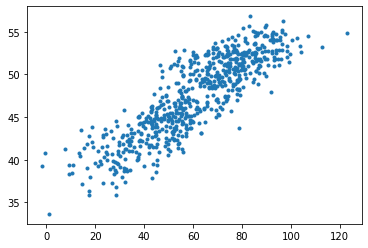

In [18]:
plt.plot(icecream,disease,'.')

In [19]:
np.corrcoef(icecream,disease)

array([[1.        , 0.86298975],
       [0.86298975, 1.        ]])

- 0.86정도.. 

`-` 여름만 뽑아서 그러보면? 

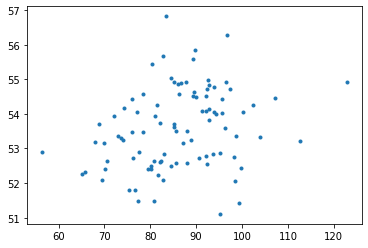

In [20]:
plt.plot(icecream[temp>25],disease[temp>25], '.') ## 평균기온이 25도가 넘어가면 여름

`-` 산점도 

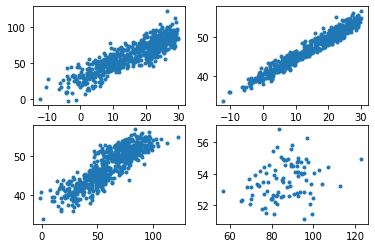

In [21]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

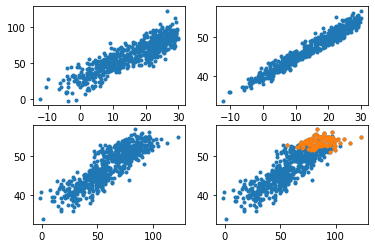

In [22]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

### 온도구간을 세분화 하여 시각화 

`-` 목표: 모든 온도구간에 대하여 각각 색을 다르게 하여 그려보자. 

- 사실 지금 변수는 온도, 아이스크림판매량, 소아마비 
- 지금까지는 기본산점도만 사용하였기에 2차원플랏만 그렸음 $\to$ 그래서 각각의 산점도를 정신없이 그려왔음 
- 온도가 유사한 지역을 색으로 묶으면 3차원 플랏이 가능함 

`-` 일단 데이터 프레임을 정리하자. 

In [23]:
df1=pd.DataFrame({'temp':temp, 'icecream':icecream, 'disease':disease})

In [24]:
df1

,temp,icecream,disease
0,-0.5,45.243454,39.333242
1,1.4,26.682436,40.643733
2,2.6,29.918282,39.163804
3,2.0,23.270314,42.640271
4,2.5,43.654076,39.456564
...,...,...,...
651,19.9,78.839992,49.633906
652,20.4,86.554679,48.920443
653,18.3,78.666079,49.882650
654,12.8,52.771364,46.613159


`-` 온도를 카테고리화 하자 $\to$ 적당한 구긴을 설정하기 위해서 히스토그램을 그려보자. 

<AxesSubplot:>

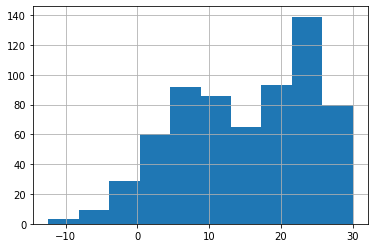

In [25]:
df1.temp.hist()

(array([  3.,   9.,  29.,  60.,  92.,  86.,  65.,  93., 139.,  80.]),
 array([-12.4 ,  -8.16,  -3.92,   0.32,   4.56,   8.8 ,  13.04,  17.28,
         21.52,  25.76,  30.  ]),
 <BarContainer object of 10 artists>)

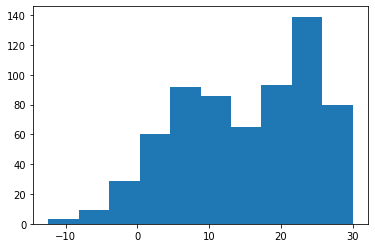

In [26]:
plt.hist(df1.temp)

`-` 구간은 5정도로 하면 적당할것 같다. 

In [32]:
def f(x): 
    if x<0: 
        y='group0'
    elif x<5: 
        y='group5'
    elif x<10: 
        y='group10'
    elif x<15: 
        y='group15'
    elif x<20:
        y='group20'
    elif x<25: 
        y='group25'
    else: 
        y='group30'
    return y 

In [33]:
df1['temp2']=list(map(f,df1.temp))

In [34]:
df1

,temp,icecream,disease,temp2
0,-0.5,45.243454,39.333242,group0
1,1.4,26.682436,40.643733,group5
2,2.6,29.918282,39.163804,group5
3,2.0,23.270314,42.640271,group5
4,2.5,43.654076,39.456564,group5
...,...,...,...,...
651,19.9,78.839992,49.633906,group20
652,20.4,86.554679,48.920443,group25
653,18.3,78.666079,49.882650,group20
654,12.8,52.771364,46.613159,group15


In [35]:
from plotnine import * 

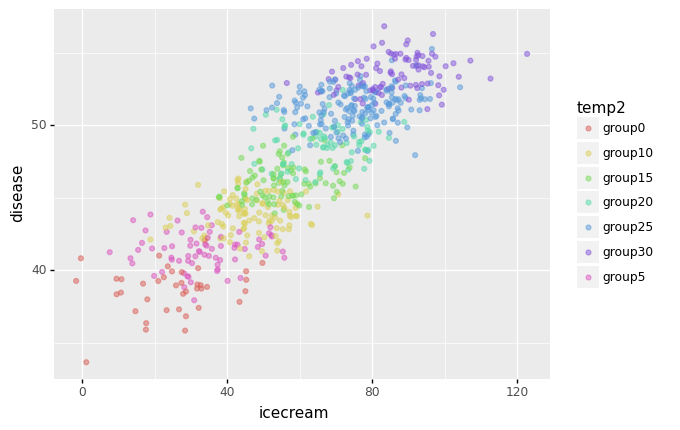

<ggplot: (8761676938087)>

In [36]:
ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.5)

/home/cgb4/anaconda3/envs/csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


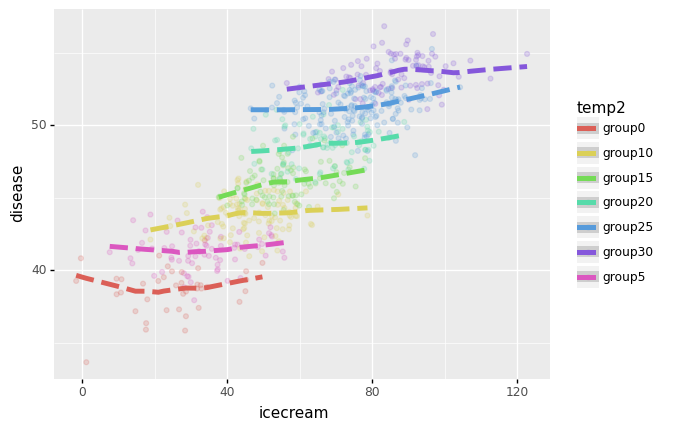

<ggplot: (8761676986356)>

In [37]:
ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

`-` 온도를 통제하니까 아이스크림과 질병은 관련이 없어보인다. 

### 진짜 만약에 아이스크림과 소아마비가 관련있는 경우라면? 

In [38]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

In [39]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease= 30+ temp*0.0 + icecream*0.15 +ϵ2*2

In [40]:
df2=pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df2['temp2']=list(map(f,df2.temp))

In [41]:
df2

,temp,icecream,disease,temp2
0,-0.5,45.243454,35.953002,group0
1,1.4,26.682436,33.889832,group5
2,2.6,29.918282,30.215350,group5
3,2.0,23.270314,36.771089,group5
4,2.5,43.654076,32.961240,group5
...,...,...,...,...
651,19.9,78.839992,41.193811,group20
652,20.4,86.554679,40.424088,group25
653,18.3,78.666079,43.265212,group20
654,12.8,52.771364,38.342022,group15


/home/cgb4/anaconda3/envs/csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


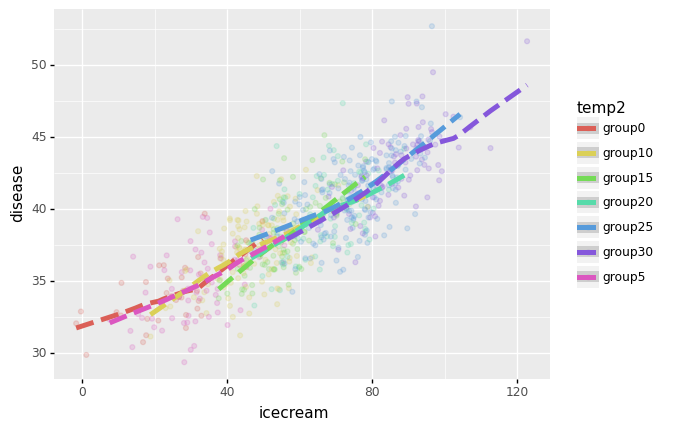

<ggplot: (8761677023787)>

In [42]:
ggplot(data=df2)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

In [43]:
df1.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.975609
icecream,0.884366,1.000000,0.862990
disease,0.975609,0.862990,1.000000


In [44]:
df2.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.725505
icecream,0.884366,1.000000,0.830539
disease,0.725505,0.830539,1.000000


### 숙제 

`-` 온도구간을 10으로 변경하고 df1, df2에서 아이스크림과 소아마비의 산점도를 시각화한뒤 스크린샷 제출 

In [45]:
def f(x): 
    if x<0: 
        y='group0'
    elif x<10: 
        y='group10'
    elif x<20:
        y='group20'
    else: 
        y='group30'
    return y 

In [46]:
df1['temp2']=list(map(f,df1.temp))

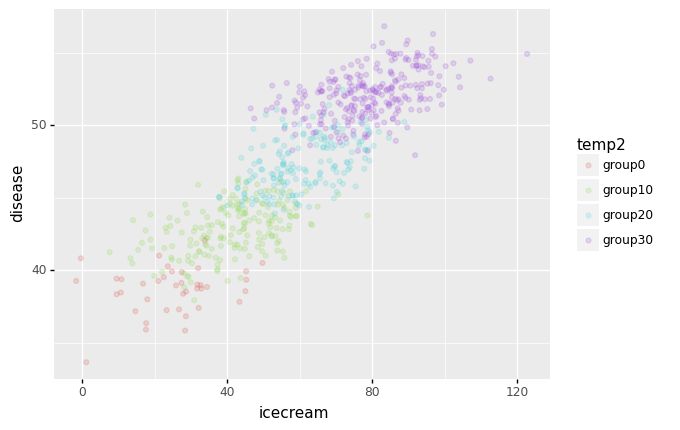

<ggplot: (8761675190709)>

In [52]:
ggplot(df1)+geom_point(aes(x='icecream',y='disease',color='temp2'),alpha=0.2)

In [48]:
df2['temp2']=list(map(f,df2.temp))

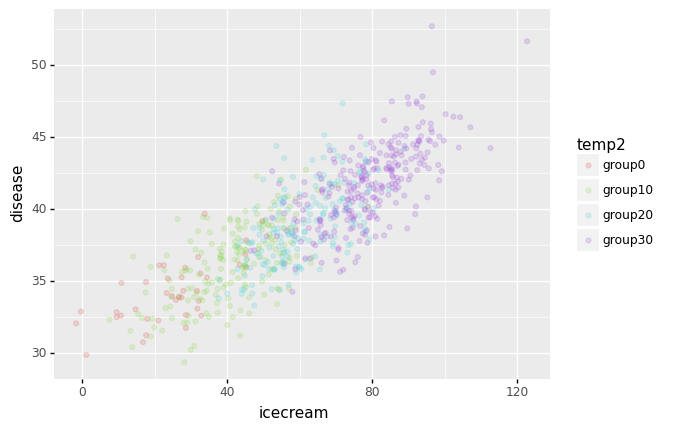

<ggplot: (8761675159167)>

In [53]:
ggplot(df2)+geom_point(aes(x='icecream',y='disease',color='temp2'),alpha=0.2)